classification of iris flowers
================

### IRIS dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

* Loading the datase
* Visualizing the dataset.
* Evaluating some algorithms.
    - Logistic Regression (LR)
    - Linear Discriminant Analysis (LDA)
    - K-Nearest Neighbors (KNN).
    - Classification and Regression Trees (CART).
    - Gaussian Naive Bayes (NB).
    - Support Vector Machines (SVM).
* Making some predictions.

Dataset is loaded:
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
1

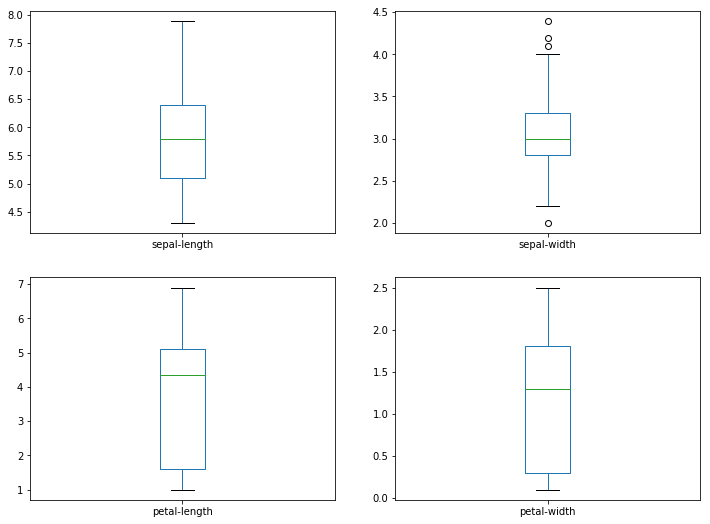


Histograms:


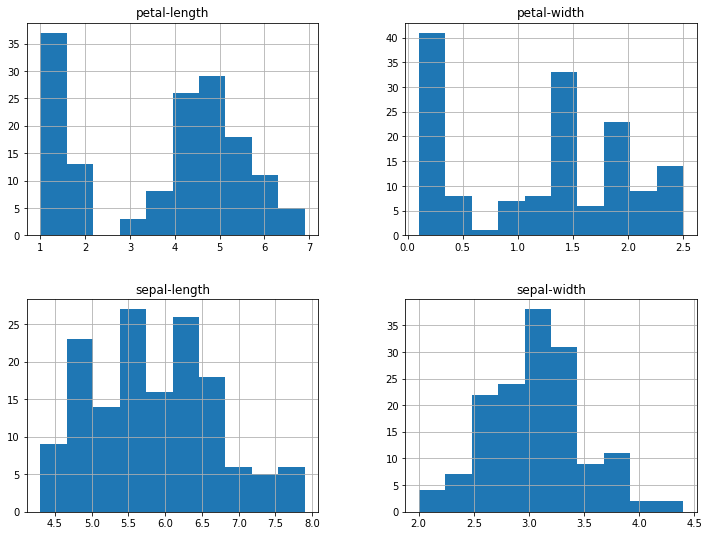


Scatter plot matrix:


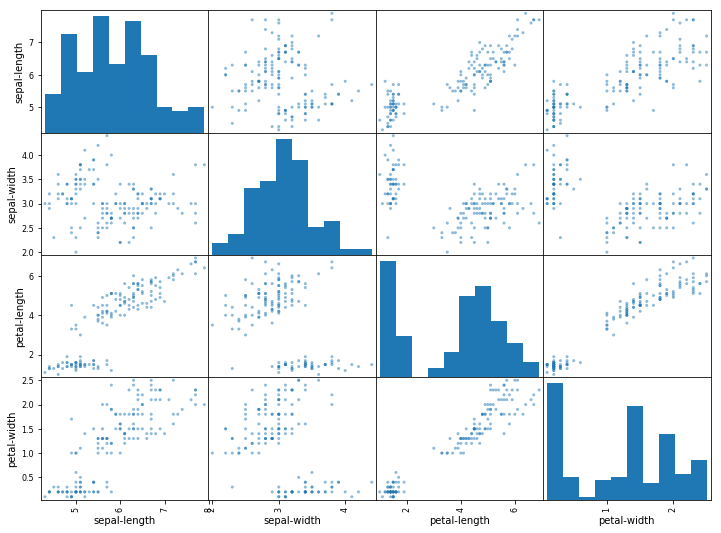


Algotith Comparition:
LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)



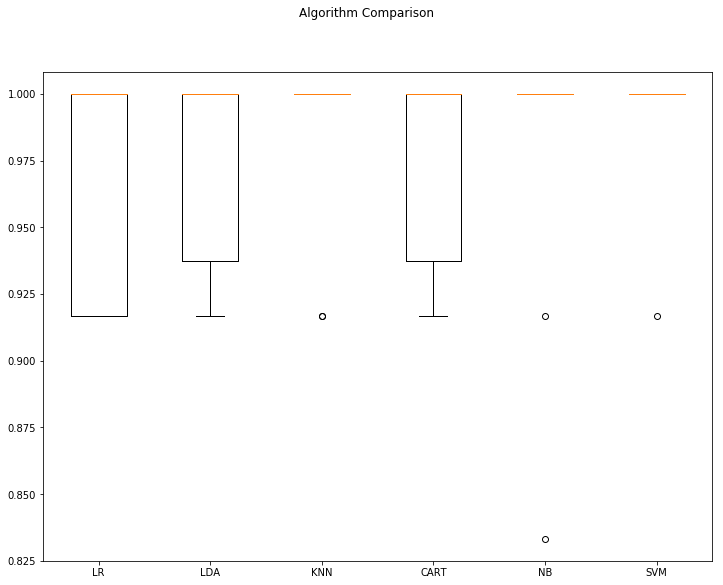


Make Predictions with the most accurate KNN algorithm on validation dataset

Accuracy: 0.9
Confusion matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

# LOAD DATASET
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
print('Dataset is loaded:')
print(dataset.head(20))
print()

# class distribution
print('Iris class distribution:')
print(dataset.groupby('class').size())
print()

# VISUALIZING DATASET
print('Box and whisker plots:')
dataset.plot(kind='box', subplots=True, layout=(2,2))
plt.show()
print()

print('Histograms:')
dataset.hist()
plt.show()
print()

print('Scatter plot matrix:')
scatter_matrix(dataset)
plt.show()
print()

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size=validation_size,
                                                                                random_state=seed)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
print('Algotith Comparition:')
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print()
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print()

# The KNN algorithm was the most accurate model that we tested
# Make predictions on validation dataset
print('Make Predictions with the most accurate KNN algorithm on validation dataset')
print()
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print('Accuracy: {}'.format(accuracy_score(Y_validation, predictions)))
print('Confusion matrix:')
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))